# Fake news prediction project

# Problem Statement:

   Fake news has become one of the biggest problems of our age. It has serious impact on our online as well as offline discourse. One can even go as far as saying that, to date, fake news poses a clear and present danger to western democracy and stability of the society.
     Fake news's simple meaning is to incorporate information that leads people to the wrong path. Nowadays fake news spreading like water and people share this information without verifying it. This is often done to further or impose certain ideas and is often achieved with political agendas.
    For media outlets, the ability to attract viewers to their websites is necessary to generate online advertising revenue. So it is necessary to detect fake news.



In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

In [ ]:
#importing Dataset
df_fake = pd.read_csv(r"C:\Users\Praveen kumar\Downloads\Fake-News-Project--1-\Fake News Project\Fake.csv")
df_true = pd.read_csv(r"C:\Users\Praveen kumar\Downloads\Fake-News-Project--1-\Fake News Project\True.csv")

In [ ]:
df_fake.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
df_true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
#Inserting a column "class" as target feature
df_fake["class"] = 0
df_true["class"] = 1

In [ ]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

In [ ]:
# Removing last 10 rows for manual testing
df_fake_manual_testing = df_fake.tail(10)
for i in range(23480,23470,-1):
    df_fake.drop([i], axis = 0, inplace = True)
    
    
df_true_manual_testing = df_true.tail(10)
for i in range(21416,21406,-1):
    df_true.drop([i], axis = 0, inplace = True)

In [ ]:
df_fake.shape, df_true.shape

((23471, 5), (21407, 5))

In [ ]:
df_fake_manual_testing["class"] = 0
df_true_manual_testing["class"] = 1

C:\Users\PRAVEE~1\AppData\Local\Temp/ipykernel_5348/860779283.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fake_manual_testing["class"] = 0
C:\Users\PRAVEE~1\AppData\Local\Temp/ipykernel_5348/860779283.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_true_manual_testing["class"] = 1


In [ ]:
df_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [ ]:
df_true_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [ ]:
df_manual_testing = pd.concat([df_fake_manual_testing,df_true_manual_testing], axis = 0)
df_manual_testing.to_csv("manual_testing.csv")

In [ ]:
#Merging True and Fake Dataframes
df_merge = pd.concat([df_fake, df_true], axis =0 )
df_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [ ]:
df_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [ ]:
#Removing columns which are not required
df = df_merge.drop(["title", "subject","date"], axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44878 entries, 0 to 21406
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    44878 non-null  object
 1   class   44878 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.0+ MB


In [ ]:
df.isnull().sum()

text     0
class    0
dtype: int64

In [ ]:
#Random Shuffling the dataframe
df = df.sample(frac = 1)

In [ ]:
df.head()

,text,class
4595,WASHINGTON (Reuters) - A looming push to overh...,1
13689,"When you read these statistics, the Orlando ma...",0
2650,Donald Trump has been on an insane Twitter ram...,0
8382,(Reuters) - Since announcing her presidential ...,1
179,When the Trump administration hired a tiny two...,0


In [ ]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [ ]:
df.columns

Index(['text', 'class'], dtype='object')

In [ ]:
df.head()

,text,class
0,WASHINGTON (Reuters) - A looming push to overh...,1
1,"When you read these statistics, the Orlando ma...",0
2,Donald Trump has been on an insane Twitter ram...,0
3,(Reuters) - Since announcing her presidential ...,1
4,When the Trump administration hired a tiny two...,0


In [ ]:
#Creating a function to process the texts
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [ ]:
df["text"] = df["text"].apply(wordopt)

Defining dependent and independent variables

In [ ]:
x = df["text"]
y = df["class"]

# Splitting Training and Testing

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

# Convert text to vectors

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [ ]:
pred_lr=LR.predict(xv_test)

In [ ]:
LR.score(xv_test, y_test)

0.986096256684492

In [ ]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5858
           1       0.98      0.99      0.99      5362

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [ ]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_confusion_matrix

accuracy: 0.986
Confusion Matrix


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

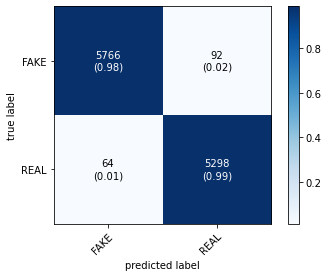

In [ ]:
scorelr = accuracy_score(y_test,pred_lr)
print("accuracy: %0.3f" %scorelr)
cmlr = confusion_matrix(y_test,pred_lr)
print("Confusion Matrix")
plot_confusion_matrix(conf_mat = cmlr, show_absolute = True, show_normed = True,
                     colorbar = True, class_names=['FAKE','REAL'])

# Decision Tree Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT=DecisionTreeClassifier()
DT.fit(xv_train,y_train)

DecisionTreeClassifier()

In [ ]:
pred_dt = DT.predict(xv_test)

In [ ]:
DT.score(xv_test, y_test)

0.9954545454545455

In [ ]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5858
           1       1.00      0.99      1.00      5362

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



accuracy: 0.995
Confusion Matrix


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

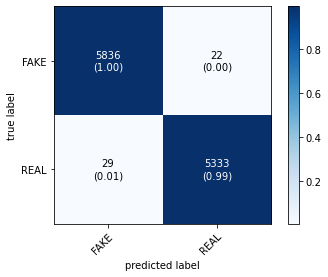

In [ ]:
scorelr = accuracy_score(y_test,pred_dt)
print("accuracy: %0.3f" %scorelr)
cmlr = confusion_matrix(y_test,pred_dt)
print("Confusion Matrix")
plot_confusion_matrix(conf_mat = cmlr, show_absolute = True, show_normed = True,
                     colorbar = True, class_names=['FAKE','REAL'])


# Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [ ]:
pred_gbc = GBC.predict(xv_test)

In [ ]:
GBC.score(xv_test, y_test)

0.9953654188948307

In [ ]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5858
           1       0.99      1.00      1.00      5362

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



accuracy: 0.995
Confusion Matrix


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

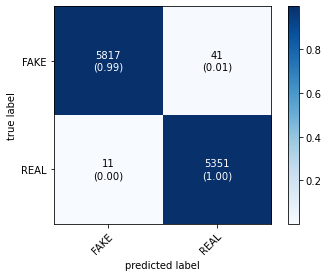

In [ ]:
scoregbc = accuracy_score(y_test,pred_gbc)
print("accuracy: %0.3f" %scorelr)
cmlr = confusion_matrix(y_test,pred_gbc)
print("Confusion Matrix")
plot_confusion_matrix(conf_mat = cmlr, show_absolute = True, show_normed = True,
                     colorbar = True, class_names=['FAKE','REAL'])


# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
pred_rfc = RFC.predict(xv_test)

In [ ]:
RFC.score(xv_test, y_test)

0.9905525846702318

In [ ]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5858
           1       0.99      0.99      0.99      5362

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



accuracy: 0.991
Confusion Matrix


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

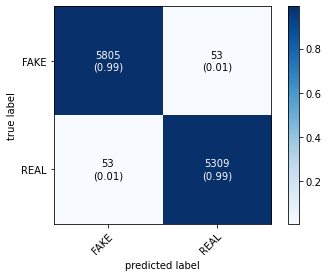

In [ ]:
scorerfc = accuracy_score(y_test,pred_rfc)
print("accuracy: %0.3f" %scorerfc)
cmlr = confusion_matrix(y_test,pred_rfc)
print("Confusion Matrix")
plot_confusion_matrix(conf_mat = cmlr, show_absolute = True, show_normed = True,
                     colorbar = True, class_names=['FAKE','REAL'])


# SVC(Support Vector Classifier)

accuracy: 0.994
Confusion Matrix


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

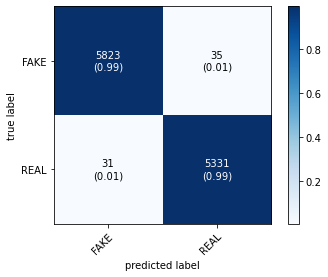

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear',random_state = 0)

svc.fit(xv_train,y_train)
y_predsvc = svc.predict(xv_test)
scoresvc = accuracy_score(y_test,y_predsvc)
print("accuracy: %0.3f" %scoresvc)
cmsvc = confusion_matrix(y_test,y_predsvc)
print("Confusion Matrix")
plot_confusion_matrix(conf_mat = cmsvc, show_absolute = True, show_normed = True,
                     colorbar = True, class_names=['FAKE','REAL'])

In [ ]:
svc.score(xv_test, y_test)

0.9938502673796792

# MultinomialNB

accuracy :0.939
Confusion Matrix


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

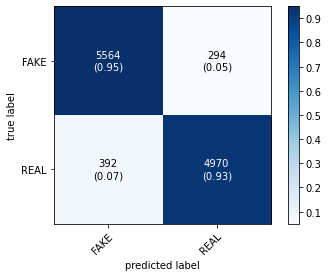

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

mnb.fit(xv_train,y_train)
y_predmnb = mnb.predict(xv_test)
scoremnb = accuracy_score(y_test,y_predmnb)
print("accuracy :%0.3f" %scoremnb)
cmmnb = confusion_matrix(y_test,y_predmnb)
print("Confusion Matrix")
plot_confusion_matrix(conf_mat = cmmnb, show_absolute = True, show_normed = True,
                     colorbar = True, class_names=['FAKE','REAL'])

# Passive Aggressive Classifier

accuracy : 0.995
Confusion Matrix


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

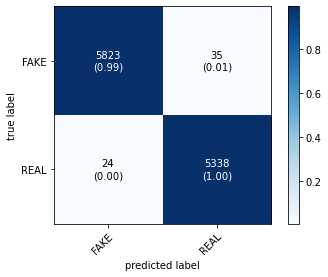

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(n_iter_no_change=50,max_iter =300)

pac.fit(xv_train,y_train)
y_predpac = pac.predict(xv_test)
scorepac = accuracy_score(y_test,y_predpac)
print("accuracy : %0.3f" %scorepac)
cmpac = confusion_matrix(y_test,y_predpac)
print("Confusion Matrix")
plot_confusion_matrix(conf_mat = cmpac, show_absolute = True, show_normed = True,
                     colorbar = True, class_names=['FAKE','REAL'])

# Hyper parameter Tuning

In [ ]:
rfc.fit(xv_train,y_train)
y_predrfc = rfc.predict(xv_test)
scorerfc = accuracy_score(y_test,y_predrfc)

In [ ]:
last_score = 0
n_estimators = [100, 300, 500, 750, 800, 1200]
for n_est in n_estimators:
    sub_rfc = RandomForestClassifier(n_estimators = n_est)
    sub_rfc.fit(xv_train,y_train)
    y_predr = sub_rfc.predict(xv_test)
    scorer = accuracy_score(y_test,y_predr)
    if scorer>last_score:
        rfc = sub_rfc
    print('n_estimator : {}, Score : {}'.format(n_est,scorer))  

n_estimator : 100, Score : 0.9881461675579323
n_estimator : 300, Score : 0.9909982174688057
n_estimator : 500, Score : 0.9915329768270945


Thus the best model for this project is RandomForestClassifier with an accuracy score of 99.2%